In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
import math
from scipy.misc import imsave
from scipy.misc import imread

Pl0 = [181.544,384-211.678] # point in the left
Pr0 = [59.61,384-211.61] # point in the right
Pl1 = [223.43,384-240] 
Pr1 = [99.95,384-241.25] 
Pl2 = [318.36,384-180.55] 
Pr2 = [223.26,384-178.93] 
Pl3 = [247.01,384-228.00] 
Pr3 = [147.036,384-228.629]
Pl4 = [268.1624283,384-196.9579168]
Pr4 = [380.9819863,384-197.3868557]
Pl5 = [122.4970724,384-255.5938338]
Pr5 = [254.4025837,384-258.4559182]
Pl6 = [101.9839782,384-328.4487622]
Pr6 = [157.0699359,384-328.4861723]
Pl7 = [117.1437091,384-372.7670914]
Pr7 = [154.1756298,384-372.2922456]

In [2]:
PL = []
PL.append(Pl0)
PL.append(Pl1)
PL.append(Pl2)
PL.append(Pl3)
PL.append(Pl4)
PL.append(Pl5)
PL.append(Pl6)
PL.append(Pl7)
PR = []
PR.append(Pr0)
PR.append(Pr1)
PR.append(Pr2)
PR.append(Pr3)
PR.append(Pr4)
PR.append(Pr5)
PR.append(Pr6)
PR.append(Pr7)

In [3]:
A = []
one = [1,1,1,1,1,1,1,1,1]
zero = [0,0,0,0,0,0,0,0,0]
for ip in range(len(PL)):
    plx = PL[ip][0]
    ply = PL[ip][1]
    prx = PR[ip][0]
    pry = PR[ip][1]
    xlxr = plx*prx
    xlyr = plx*pry
    xl = plx
    ylxr = ply*prx
    ylyr = ply*pry
    yl = ply
    xr = prx
    yr = pry
    null = 1
    Ai = [xlxr,xlyr,xl,ylxr,ylyr,yl,xr,yr,1]
    A.append(Ai) 
#A.append(one)
Aarray = np.matrix(A)
Aarray
AarrayT = Aarray.transpose()
#print(AarrayT)
AA = Aarray.transpose()*Aarray
AA

matrix([[  1.89785181e+10,   1.27924897e+10,   7.35171923e+07,
           1.29634509e+10,   8.74645009e+09,   4.94105588e+07,
           7.62377751e+07,   4.93506413e+07,   3.07958031e+05],
        [  1.27924897e+10,   1.05065948e+10,   5.91136168e+07,
           8.74645009e+09,   7.25164229e+09,   4.09200513e+07,
           4.93506413e+07,   4.08988936e+07,   2.39309706e+05],
        [  7.35171923e+07,   5.91136168e+07,   3.56286220e+05,
           4.94105588e+07,   4.09200513e+07,   2.39630087e+05,
           3.07958031e+05,   2.39309706e+05,   1.58013119e+03],
        [  1.29634509e+10,   8.74645009e+09,   4.94105588e+07,
           9.12617971e+09,   6.09308091e+09,   3.46894431e+07,
           5.26611997e+07,   3.46077415e+07,   2.07408572e+05],
        [  8.74645009e+09,   7.25164229e+09,   4.09200513e+07,
           6.09308091e+09,   5.12091534e+09,   2.91199000e+07,
           3.46077415e+07,   2.90874048e+07,   1.70462477e+05],
        [  4.94105588e+07,   4.09200513e+07,   2.3

In [4]:
w, v = LA.eig(AA)
v1 = v.transpose()
imin = np.argmin(w)
en = w[imin]
ev = v1[imin]
ev

matrix([[ -1.50661945e-04,  -1.29345353e-04,   3.57579418e-02,
           2.67331190e-04,   1.88290566e-05,  -6.14171512e-01,
          -8.55249429e-03,   5.95988727e-01,  -5.15983434e-01]])

In [5]:
AA*ev.transpose()

matrix([[  0.00000000e+00],
        [  2.23517418e-08],
        [ -3.49245965e-10],
        [  0.00000000e+00],
        [  1.11758709e-08],
        [  4.36557457e-11],
        [  0.00000000e+00],
        [  8.73114914e-11],
        [ -1.61435310e-11]])

In [6]:
ev1 = np.array(ev)
ev1 = ev1[0]
F = [[ev1[0],ev1[3],ev1[6]],[ev1[1],ev1[4],ev1[7]],[ev1[2],ev1[5],ev1[8]]]
MatrixL = np.array(F)
MatrixR = MatrixL.transpose()

(0, 1.3637487496513309e-11, 1.4091381484374438e-11)
(1, 3.2151134947164813e-10, 3.2992494628071706e-10)
(2, 6.97952270398689e-11, 6.888629273750639e-11)
(3, 4.118342609369625e-10, 4.154297074565873e-10)
(4, 2.965319703030738e-11, 2.682024582819881e-11)
(5, 1.5826893028222383e-11, 1.475703479186327e-11)
(6, 4.592993993604271e-11, 4.493263168796596e-11)
(7, 7.659370025352322e-13, 7.537534571765053e-13)


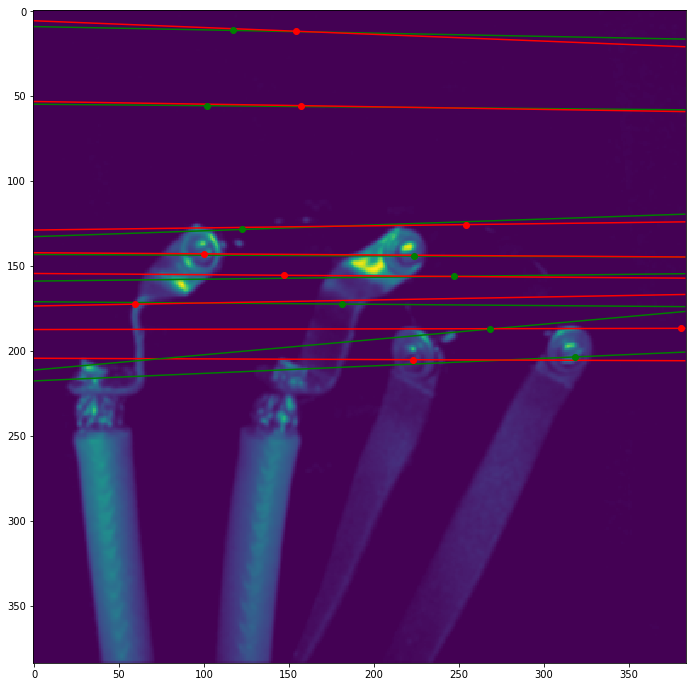

In [7]:
imgL = imread('v0.png')
imgR = imread('u0.png')
plt.figure(figsize=(12,12))
plt.imshow(imgL+imgR)
x = np.arange(0,384,1)
for ip in range(0,len(PL)):
    ipL = PL[ip]
    ipR = PR[ip]
    off = np.ones((1,1))
    ipL = np.append(ipL, off)
    ipR = np.append(ipR, off)
    LineL = np.dot(ipR,MatrixL) #points in the right frame and the corresponding epipolar lines in the left frame
    LineR = np.dot(ipL,MatrixR) #points in the left frame and the corresponding epipolar lines in the right frame
    yL = (-LineL[2]-LineL[0]*x)/LineL[1]
    yR = (-LineR[2]-LineR[0]*x)/LineR[1]
    dlr = math.fabs(np.dot(ipL,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    drl = math.fabs(np.dot(ipR,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])  
    plt.plot(x,yL,color='g')
    plt.plot(x,yR,color='r')
    plt.plot(PR[ip][0],PR[ip][1],"o",color='r')    
    plt.plot(PL[ip][0],PL[ip][1],"o",color='g')  
    print(ip,dlr,drl)
plt.show()